In [1]:
import gymnasium as gym
print(gym.__version__)

0.29.0


## Cartpole

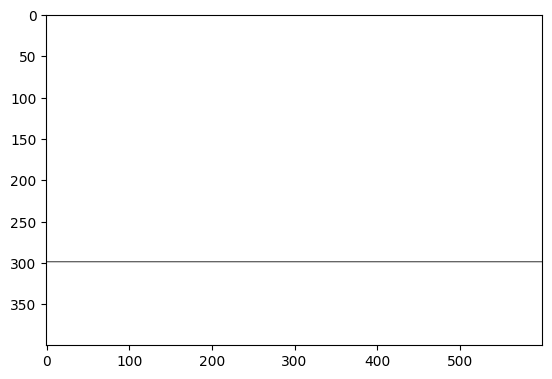

[-17.899378  -18.09973     5.020575   -2.2498245]


In [3]:
import gymnasium as gym
import matplotlib.pyplot as plt
import cv2
from IPython import display

env = gym.make('CartPole-v1', render_mode='rgb_array')

observation = env.reset()
print(f"observation = {observation}")

for _ in range(100):
    rgb_array = env.render()
    plt.imshow(rgb_array)
    display.clear_output(wait = True)
    display.display(plt.gcf())
    observation, reward, terminated, truncated, info = env.step(0)
    print(observation)
plt.close()
env.close()

## Cartpole eazy algorithm

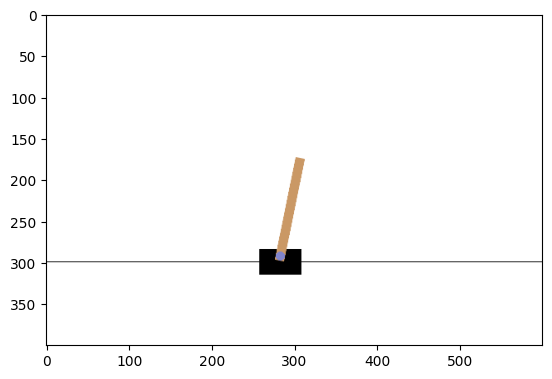

[-0.14361162 -0.23302174  0.21363914  0.37579438] True
39


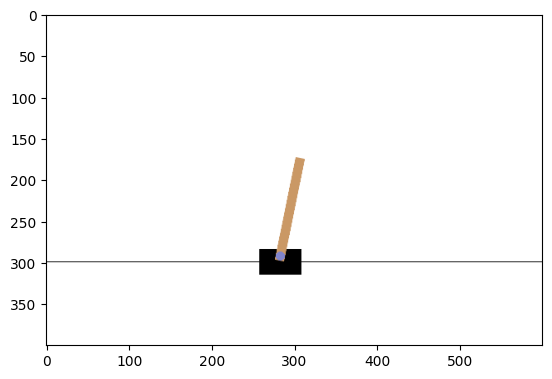

In [13]:
import gymnasium as gym
import matplotlib.pyplot as plt
import cv2
from IPython import display

env = gym.make('CartPole-v1', render_mode='rgb_array')
observation, info = env.reset(seed=17)

for i in range(1, 40):
    rgb_array = env.render()
    # if 막대기가 오른쪽으로 기울어져 있다면: 오른쪽으로 힘을 가함
    # else: 왼쪽으로 힘을 가함

    # Eazy Control
    if observation[2] > 0:
        action = 1
    else: action = 0
    
    plt.imshow(rgb_array)
    display.clear_output(wait = True)
    display.display(plt.gcf())

    observation, reward, terminated, truncated, info = env.step(action)
    print(observation, terminated)
    if terminated:
        print(i)
        break
env.close()